In [4]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
from TomTomUnifiedModel import aggregation_functionTomTom
from WeatherData import aggregation_functionWeather
import os
import sys
from datetime import datetime


#Dataframe with Greek Holidays
holidays_dict = {'ds': ['2019-01-01',"2019-01-06", "2019-03-25", "2019-04-26",  "2019-04-29", "2019-05-01", "2019-06-17", "2019-08-15", "2019-10-28", "2019-12-25", "2019-12-26"], 'holiday' : ["New Year's Day", "Epiphany", "Independence Day", "Orthodox Good Friday", "Orthodox Easter Monday", "Labour Day", "Orthodox Whit Monday", "Assumption", "Ochi Day", "Christmas Day", "Boxing Day"] }
holidays_data = pd.DataFrame.from_dict(holidays_dict)



#Function to state True if the column matchs the day of the week of the record, otherwise False
def prepare_data(d):
    d["mon"] = d["ds"].dt.dayofweek == 0
    d["tue"] = d["ds"].dt.dayofweek == 1
    d["wed"] = d["ds"].dt.dayofweek == 2
    d["thu"] = d["ds"].dt.dayofweek == 3
    d["fri"] = d["ds"].dt.dayofweek == 4
    d["sat"] = d["ds"].dt.dayofweek == 5
    d["sun"] = d["ds"].dt.dayofweek == 6
    
aggregation_vales = [15,30,45,60]

#Aggregation function returns the data aggregated according to a value
data = aggregation_functionTomTom(60)

#Applying styles to the plots
plt.style.use('fivethirtyeight')

#Dataframes which will store the results are created
results1d = pd.DataFrame()
results4d = pd.DataFrame()

#Dataframe is created previously its use
prophet_df = pd.DataFrame()

data

,timestamp,cs_Gate 10A - Entry,cs_Gate 10A - Exit,cs_Gate 16 - Entrance,cs_Gate 16 - Exit
0,2018-04-28 00:00:00,1.0,NaN,NaN,NaN
1,2018-04-28 01:00:00,0.0,NaN,NaN,NaN
2,2018-04-28 02:00:00,0.0,1.0,NaN,NaN
3,2018-04-28 03:00:00,0.0,0.0,NaN,NaN
4,2018-04-28 04:00:00,1.0,0.0,NaN,NaN
...,...,...,...,...,...
15547,2020-02-04 19:00:00,2.0,12.0,10.0,11.0
15548,2020-02-04 20:00:00,4.0,10.0,11.0,11.0
15549,2020-02-04 21:00:00,3.0,22.0,1.0,8.0
15550,2020-02-04 22:00:00,2.0,7.0,NaN,0.0


In [5]:
i = 4
#The columns names are changed according to Prophet requirements
prophet_df['ds']=data['timestamp']
prophet_df['y'] = data.iloc[:,i]


#Datetype is applied to timestamp column
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format = '%Y-%m-%d %H:%M:%S')


#Daily seasonality is created defininf a seasonality for each day 
m = Prophet(daily_seasonality=False, holidays = holidays_data)
m.add_seasonality(name='mon', period=1, fourier_order=7, condition_name='mon')
m.add_seasonality(name='tue', period=1, fourier_order=7, condition_name='tue')
m.add_seasonality(name='wed', period=1, fourier_order=7, condition_name='wed')
m.add_seasonality(name='thu', period=1, fourier_order=7, condition_name='thu')
m.add_seasonality(name='fri', period=1, fourier_order=7, condition_name='fri')
m.add_seasonality(name='sat', period=1, fourier_order=7, condition_name='sat')
m.add_seasonality(name='sun', period=1, fourier_order=7, condition_name='sun')

#Column with the day of the week is added to the DataFrame    
prepare_data(prophet_df)

#The model is trained
m.fit(prophet_df)
        
#The dataframe with the dates to predict for the next 14 days is created 
future = m.make_future_dataframe(periods=14*24, freq = "1h")
        
#Day of the week is evaluated as well for predictions
prepare_data(future)
        
#Forecast results
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


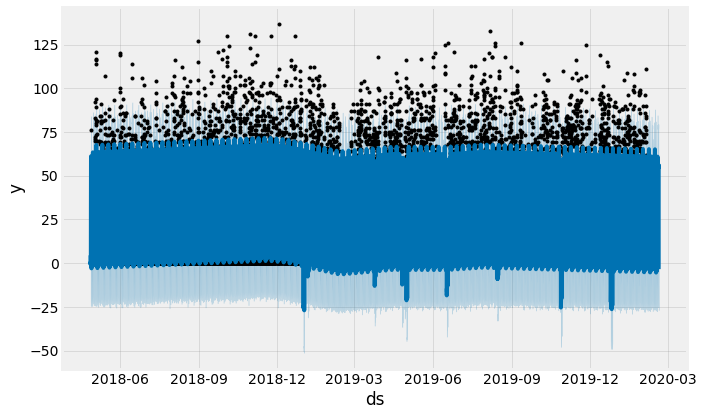

In [6]:
#Plot of the model fitting and predictions
m.plot(forecast)
plt.show()

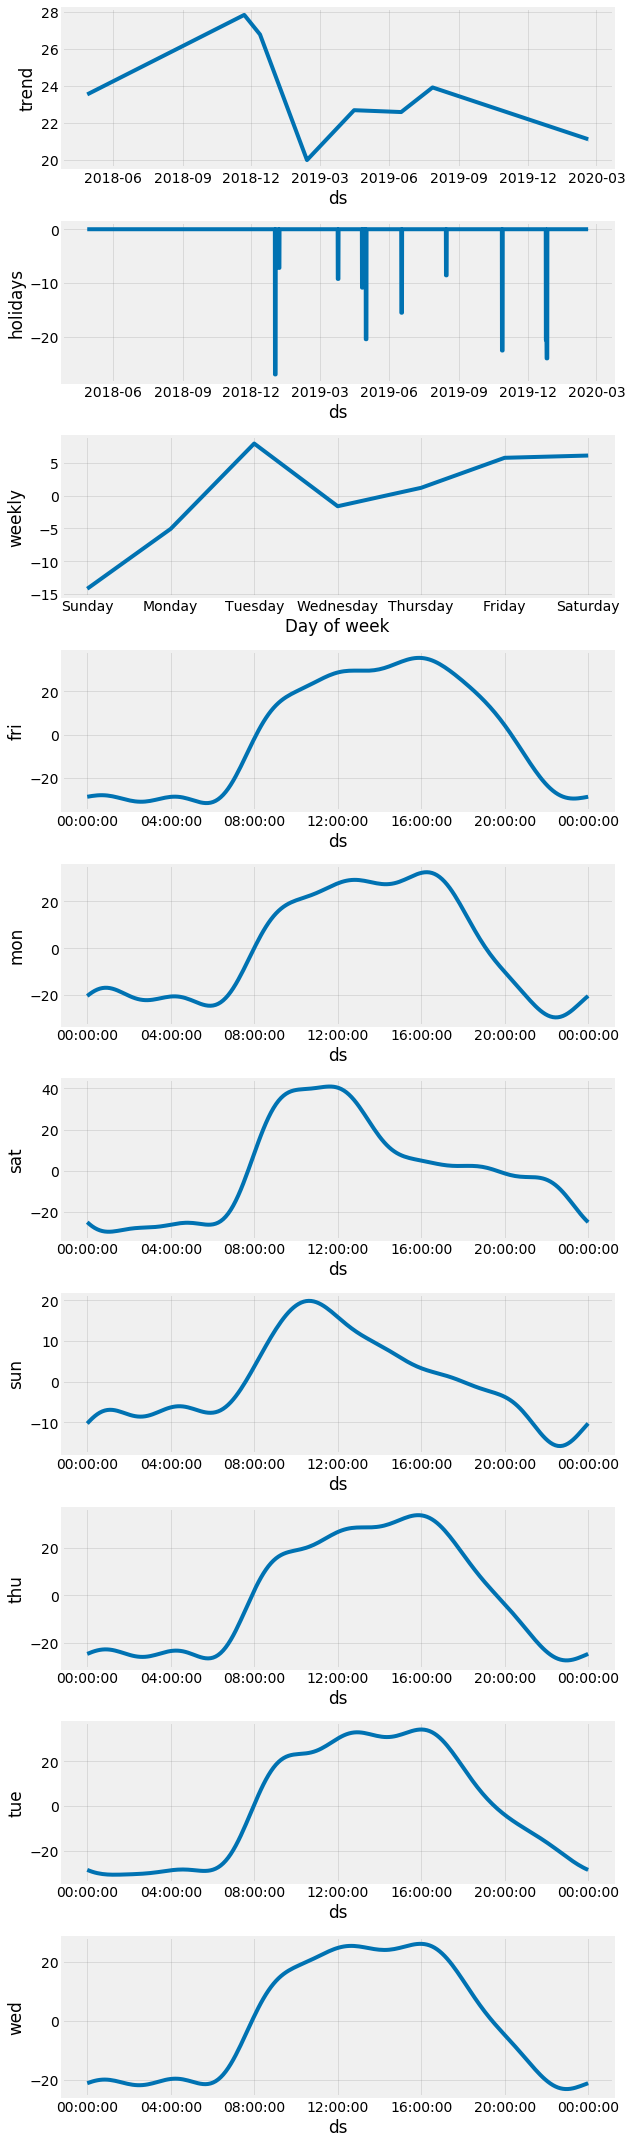

In [4]:
#Components of the time series are plotted, as seasonalities too    
m.plot_components(forecast)
plt.show()

INFO:fbprophet:Making 126 forecasts with cutoffs between 2018-05-19 23:00:00 and 2020-02-03 23:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


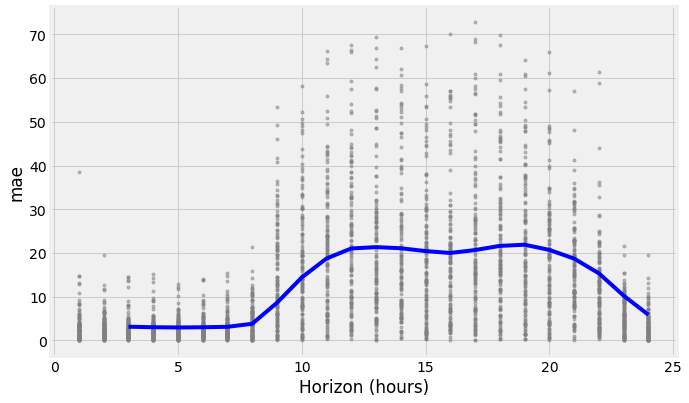

In [5]:
#Cross validation is applied for 1 day prediction
df_cv = cross_validation(m, initial = '21 days', period = '5 days', horizon = '1 days')
df_p = performance_metrics(df_cv, rolling_window = 0)
df_p['location_id'] = list(data)[i]
results1d = results1d.append(df_p)
plot_cross_validation_metric(df_cv, metric = 'mae')
plt.show()

INFO:fbprophet:Making 125 forecasts with cutoffs between 2018-05-21 23:00:00 and 2020-01-31 23:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


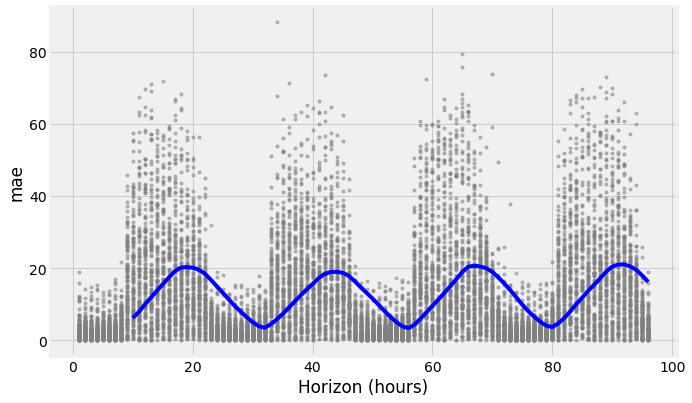

In [6]:
#Cross validation is applied for 4 days prediction
df_cv2 = cross_validation(m, initial = '21 days', period = '5 days', horizon = '4 days')
df_p2 = performance_metrics(df_cv2, rolling_window = 0)
df_p2['location_id'] = list(data)[i]
results4d = results4d.append(df_p2)
plot_cross_validation_metric(df_cv2, metric = 'mae')
plt.show()